<a href="https://colab.research.google.com/github/paulinawdowiak1/ML-Bootcamp/blob/main/supervised/ML_Bootcamp_15_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <a name='1'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)

### <a name='2'></a> Załadowanie danych

In [2]:
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = [name.replace(' ', '_')[:-5] for name in all_data['feature_names']]
target_names = all_data['target_names']

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {target_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


### <a name='3'></a> Eksploracja danych
Iris Setosa

In [3]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

Iris Versicolor

In [4]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)

Iris Virginica

In [5]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)

In [9]:
df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


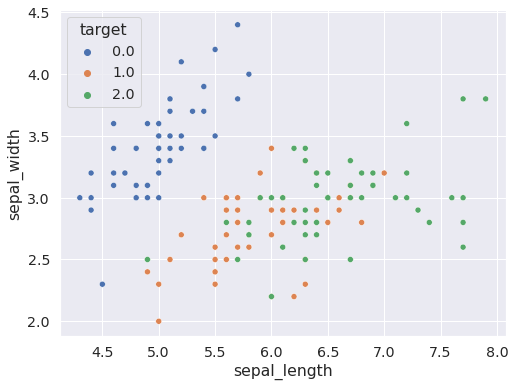

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot('sepal_length','sepal_width', hue='target', data=df, legend='full', palette=sns.color_palette()[:3])

In [14]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

### <a name='4'></a> Przygotowanie danych do modelu

In [15]:
data = df.copy()
data = data[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')

data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [16]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [17]:
data = data.values
target = target.values.astype('int16')

### <a name='5'></a> Budowa klasyfikatora drzewa decyzyjnego
- max_depth=1


In [18]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
classifier.fit(data, target)

DecisionTreeClassifier(max_depth=1, random_state=42)

Wykreślenie granic decyzyjnych

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


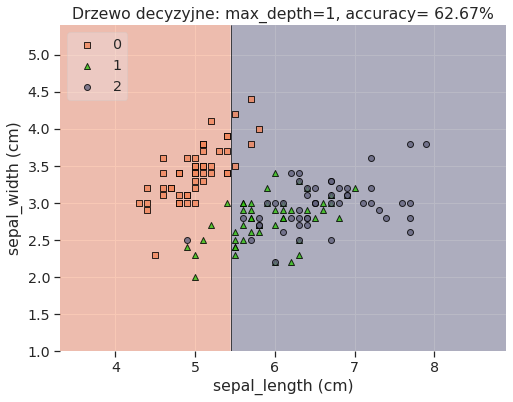

In [20]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(data, target)

plt.figure(figsize=(8,6))
plot_decision_regions(data, target, classifier, legend=2, colors=colors)
plt.xlabel('sepal_length (cm)')
plt.ylabel('sepal_width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy= {acc * 100:.2f}%')
plt.show()

### <a name='6'></a>  Graf drzewa decyzyjnego
- max_depth = 1

Wyświetlenie grafu drzewa decyzyjnego

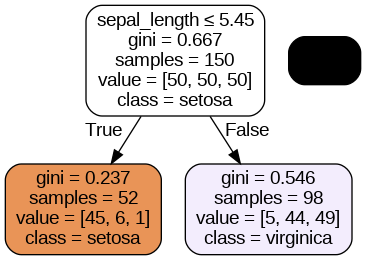

In [33]:
from scipy import special
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
                out_file=dot_data,
                feature_names=feature_names[:2],
                class_names=target_names,
                special_characters=True,
                rounded=True,
                filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=300)

### <a name='7'></a> Budowa funkcji dla modelu drzewa decyzyjnego

In [27]:
from pandas.io.formats.format import stringify_path
def make_decision_tree(max_depth=1):
  #trenowanie modelu
  classifier=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  classifier.fit(data, target)

  #eksport grafu drzewa
  dot_data = StringIO()
  export_graphviz(classifier,
                   out_file=dot_data,
                   feature_names=feature_names[:2],
                   class_names=target_names,
                   special_characters=True,
                   rounded=True,
                   filled=True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('graph.png')

  #obliczenie dokadności
  acc = classifier.score(data, target)

  #wykreślenie granic decyzyjnych
  plt.figure(figsize=(8,6))
  ax = plot_decision_regions(data, target, classifier, legend=2, colors=colors)
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles, ['setosa', 'versicolor','virginical'], framealpha=0.3)
  plt.xlabel('sepal_length (cm)')
  plt.ylabel('sepal_width (cm)')
  plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy= {acc * 100:.2f}%')
  plt.show()

  return Image(graph.create_png(), width=200 + max_depth * 120)


- max_depth=2


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


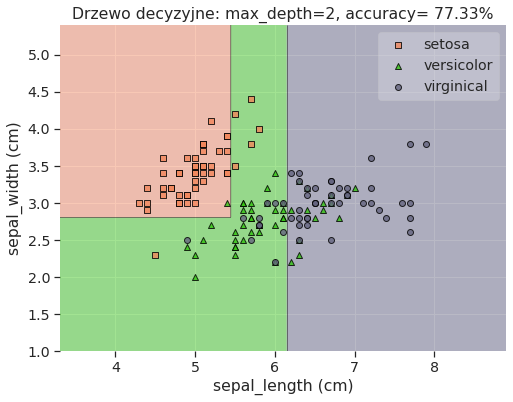

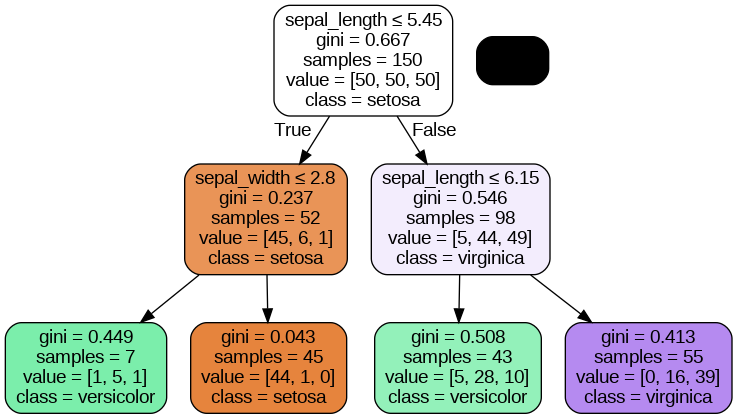

In [28]:
make_decision_tree(max_depth=2)

- max_depth=3

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


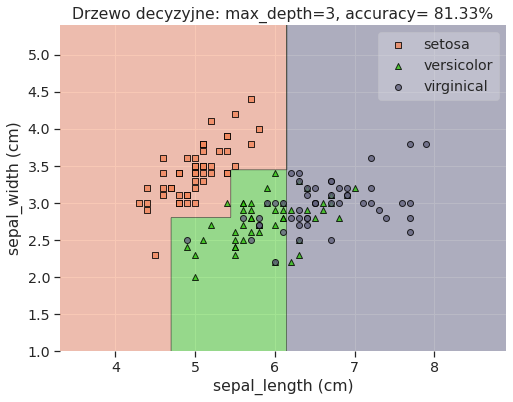

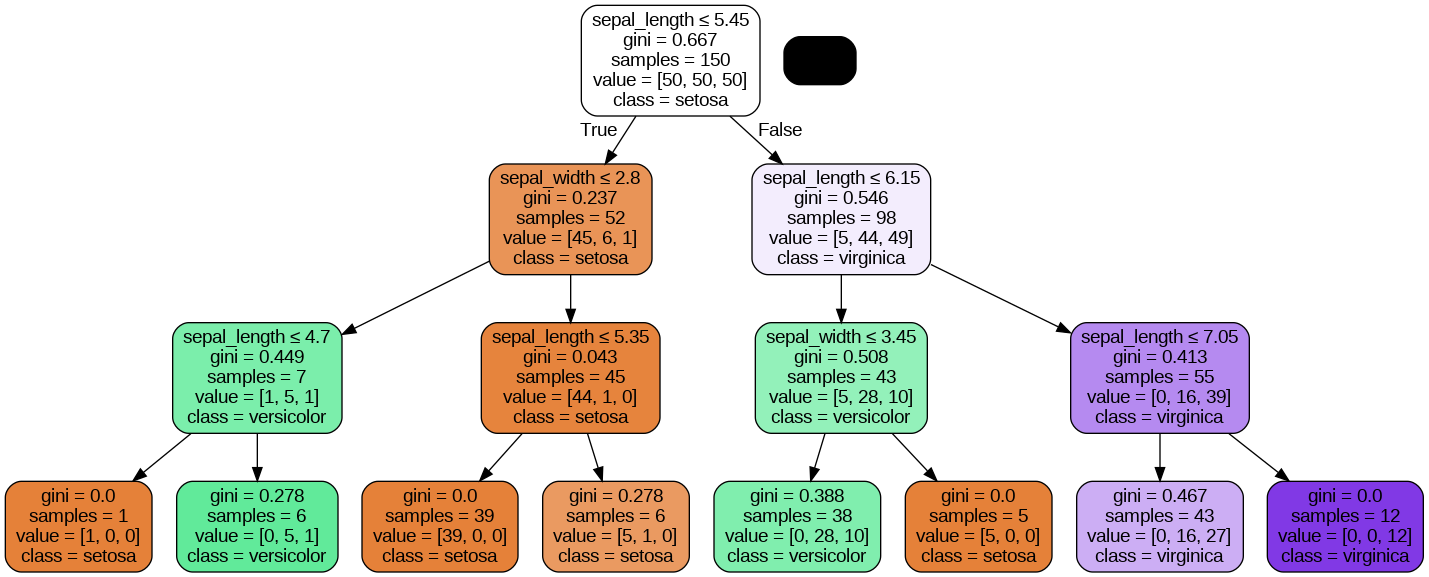

In [29]:
make_decision_tree(max_depth=3)

- max_depth=4

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


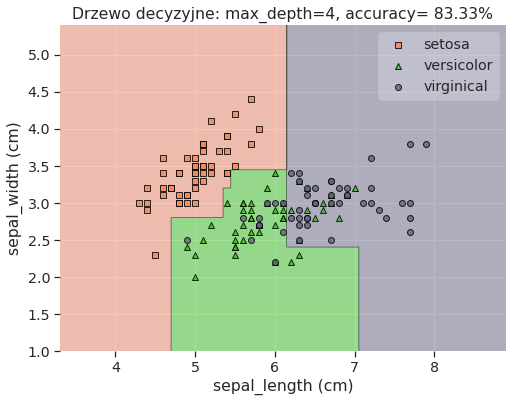

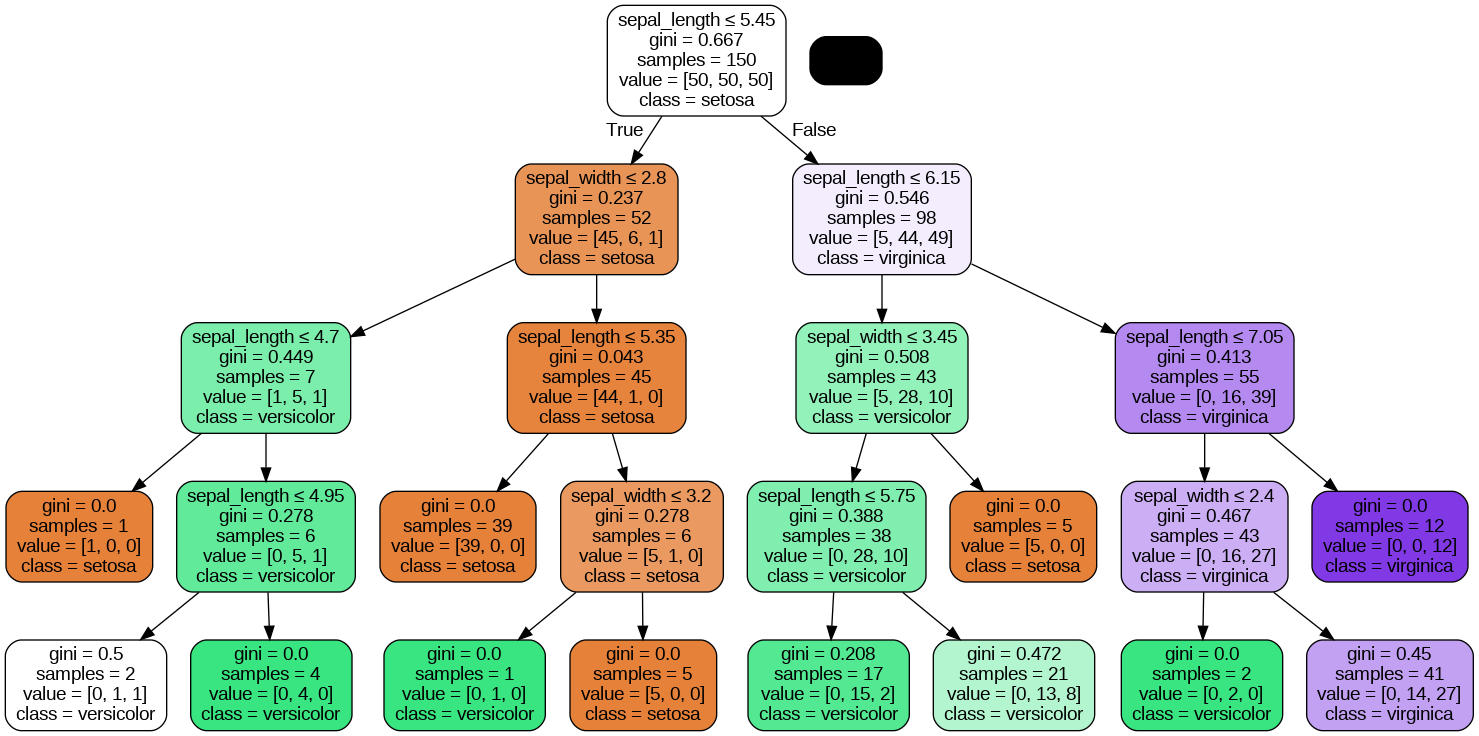

In [30]:
make_decision_tree(max_depth=4)

- max_depth=5

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


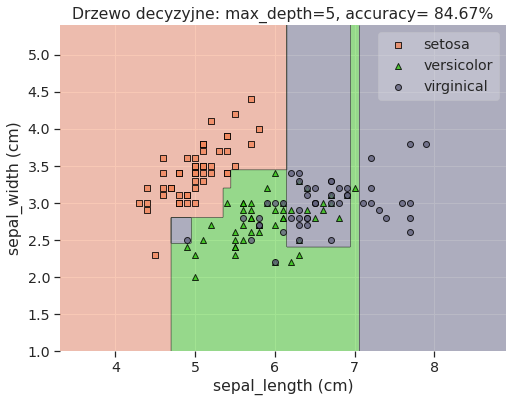

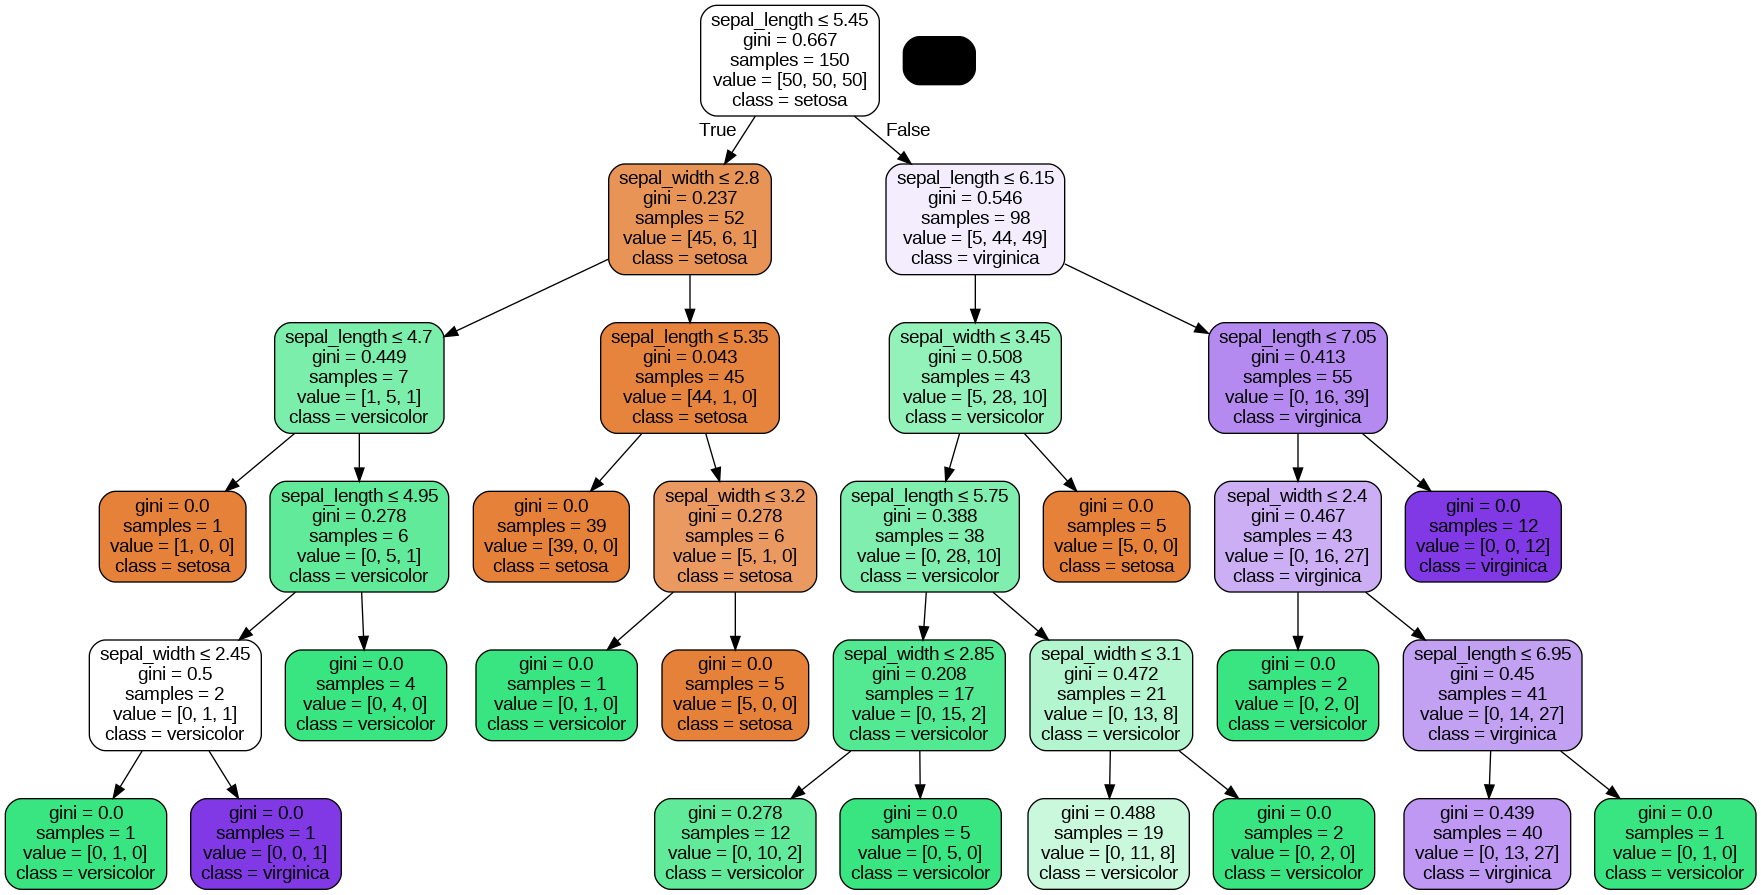

In [31]:
make_decision_tree(max_depth=5)